<a href="https://colab.research.google.com/github/Yujini68/ESAA/blob/main/PROJECT1_%EC%88%98%EC%A0%95%EB%B3%B8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드 및 패키지

In [ ]:
from google.colab import drive
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 데이터 브리핑

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


결측치 없음

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 범주형의 경우 null값이 "null"과 같이 있을 수 있기에 확인

In [ ]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


정말로 결측치가 하나도 없었다.

# 데이터 시각화

In [ ]:
columns = df.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
con_list = ['age', 'bmi', 'children', 'charges']
cat_list = ['sex', 'smoker', 'region']

연속형 변수 분포 확인

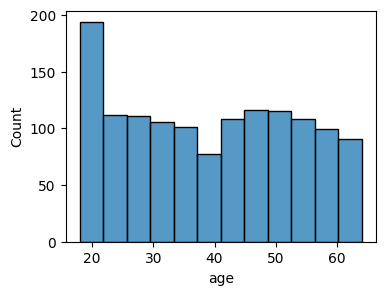

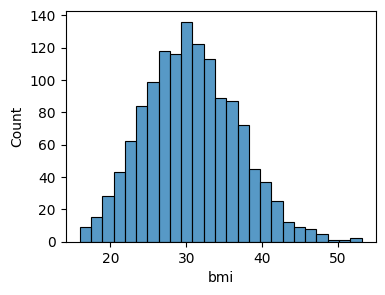

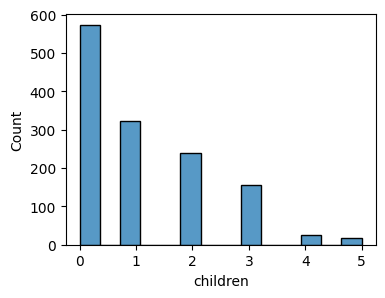

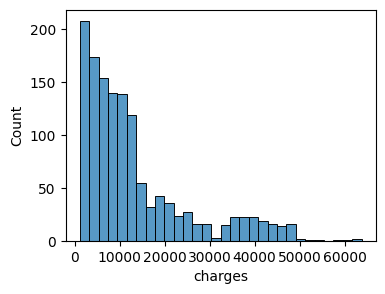

In [ ]:
for i in con_list:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.histplot(df[i])

종속변수가 꽤나 skew되어 보임.

범주형 변수 분포 확인

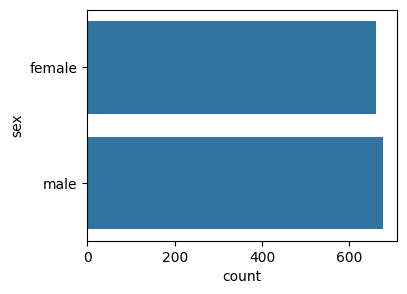

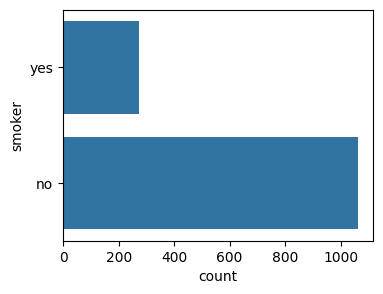

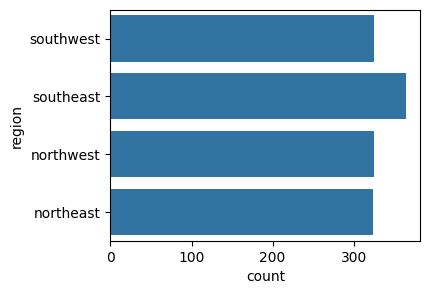

In [ ]:
for i in cat_list:
  ax = plt.subplots(figsize=(4, 3))
  ax = sns.countplot(df[i])

연속형 변수 간의 상관관계 확인

In [ ]:
con_list[:-1]

['age', 'bmi', 'children']

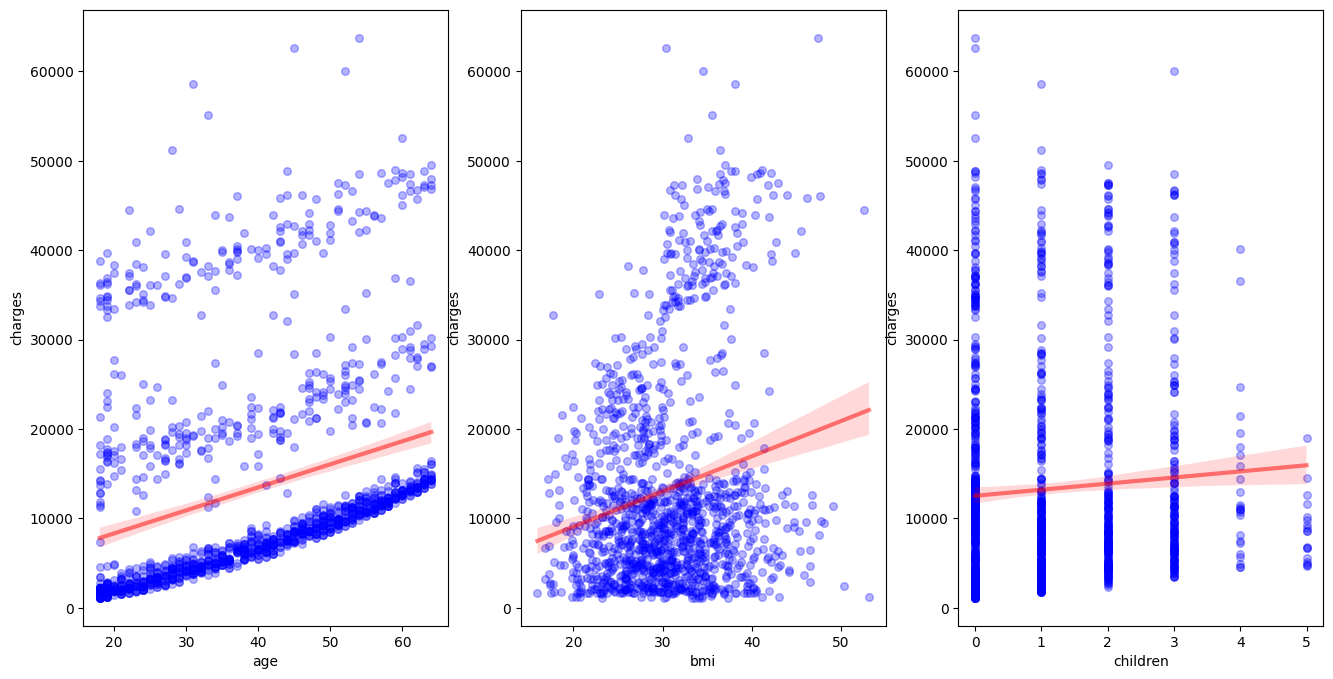

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , nrows=1, ncols=3)

for i , feature in enumerate(con_list[:-1]):
    row = 0
    col = i
    plt.xlabel(feature)
    sns.regplot(x=feature , y='charges',data=df ,
                ax=axs[col],
                scatter_kws={"fc":"b", "ec":"b", "s":30, "alpha":0.3}, color="r", line_kws={"lw":3,"alpha":0.5})

- 나이에 따라서 charges가 많아지긴 하는데 그와 별개로 애초에 charges가 세 그룹으로 나뉘어 보임
- bmi 정상 범위가 	18.5 ~ 22.9라고 하는데... 그 사이에 위치한 사람들은 크게 상관관계가 없어 보이나 그 이상의 경우 bmi가 크면 charge가 크다고 볼법한 케이스가 꽤 있는듯?
- children과 상관관계 잘 모르겠음.

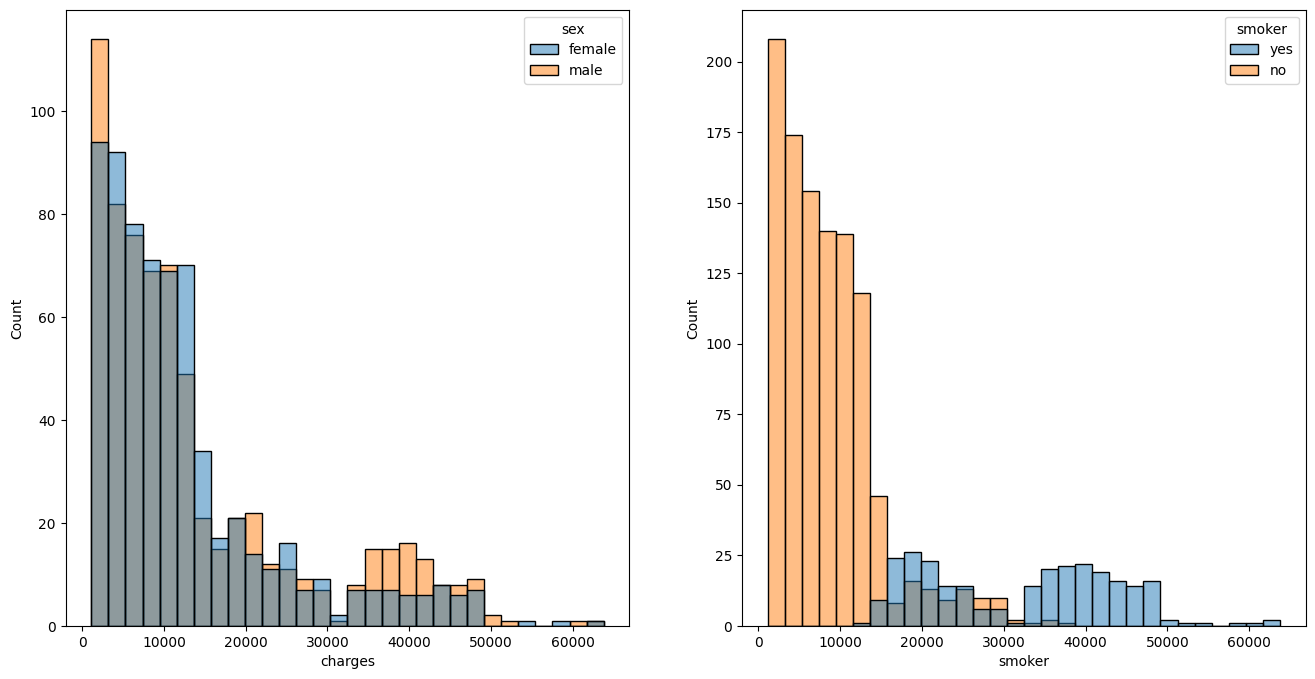

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , nrows=1, ncols=2)

for i , feature in enumerate(cat_list[:2]):
    row = 0
    col = i
    plt.xlabel(feature)
    sns.histplot(x='charges' , hue=feature, data=df, ax=axs[col])

- 남성 집단과 흡연자 집단이 전반적으로 charge가 높아보임.

In [ ]:
print(np.mean(df['charges'][df['sex']=='female']))
print(np.mean(df['charges'][df['sex']=='male']))
print(np.mean(df['charges'][df['smoker']=='no']))
print(np.mean(df['charges'][df['smoker']=='yes']))

12569.578843835347
13956.751177721893
8434.268297856204
32050.23183153284


- 평균값으로 비교해봐도 확실히 남성집단이 여성 집단보다 charges가 큼
- 흡연자와 비흡연자간의 차이가 정말 크다. 약 4배

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

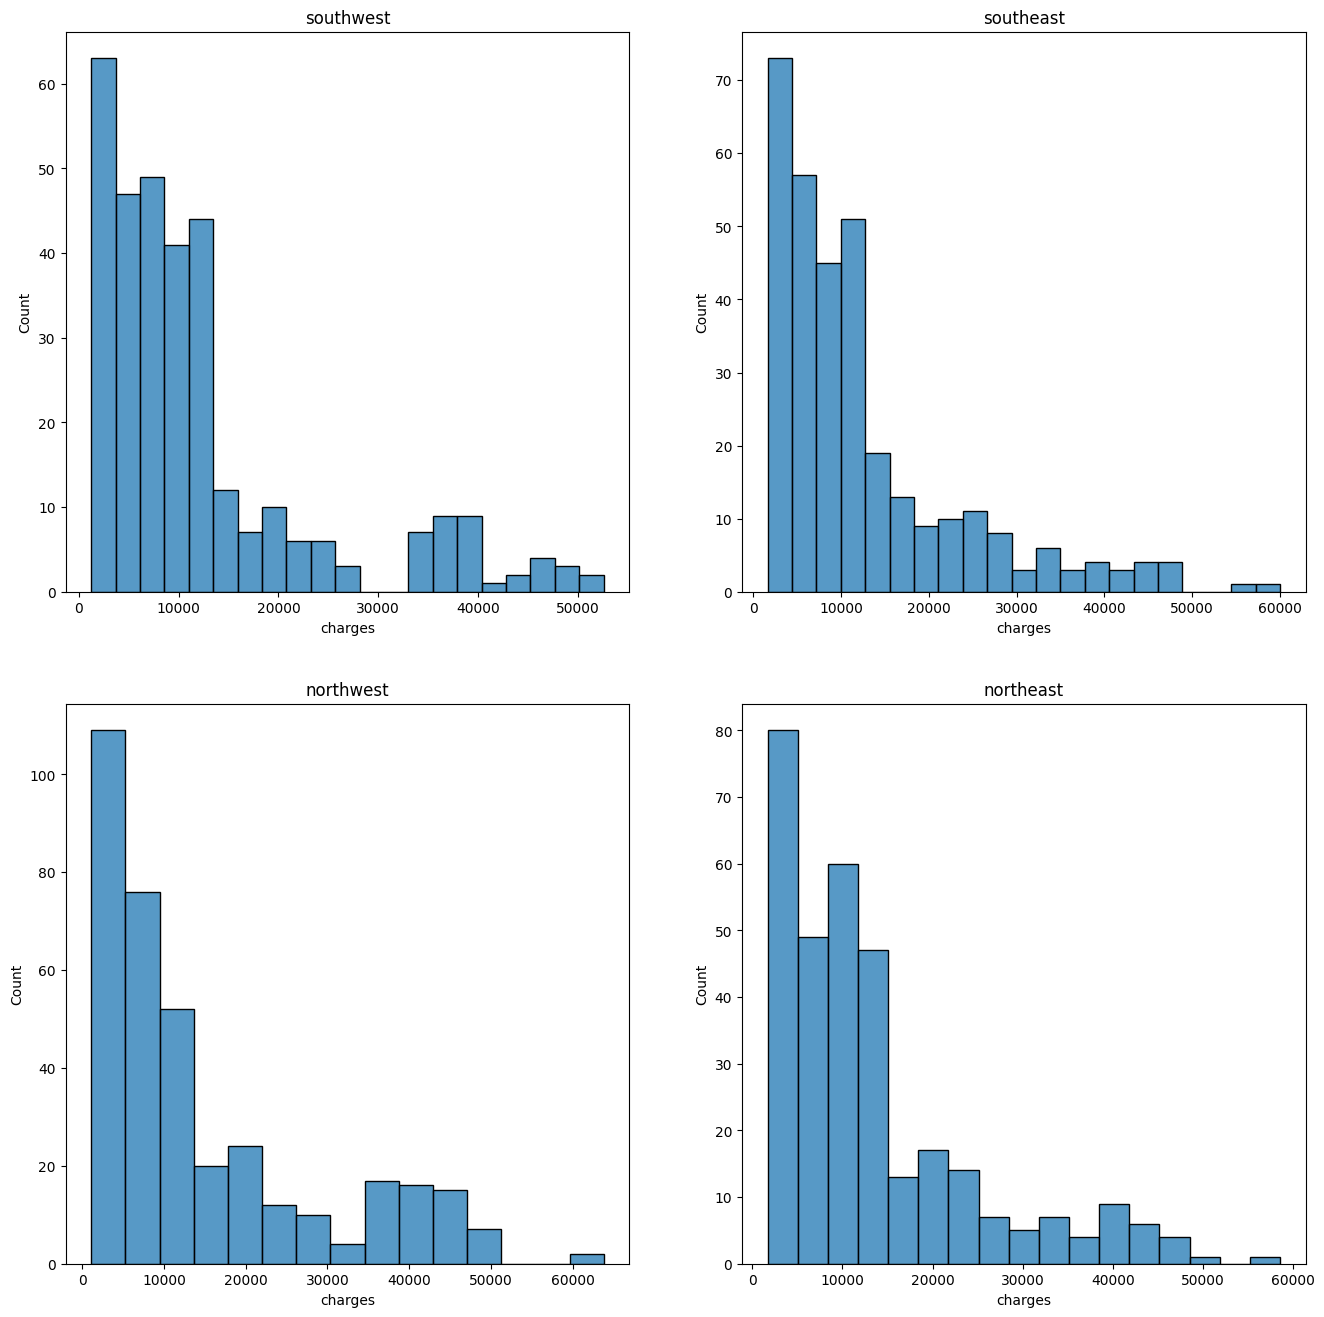

In [ ]:
fig, axs = plt.subplots(figsize=(16,16) , nrows=2, ncols=2)

for i , regions in enumerate(['southwest', 'southeast', 'northwest', 'northeast']):
    row = i%2
    col = i//2
    sns.histplot(x='charges' ,  data=df[df['region'] == regions], ax=axs[row][col])

axs[0, 0].title.set_text("southwest")
axs[0, 1].title.set_text("southeast")
axs[1, 0].title.set_text("northwest")
axs[1, 1].title.set_text("northeast")

In [ ]:
for regions in ['southwest', 'southeast', 'northwest', 'northeast']:
    print(np.mean(df['charges'][df['region']==regions]))

12346.937377292308
14735.411437609888
12417.57537396923
13406.384516385804


In [ ]:
df_encoded = pd.get_dummies(df, drop_first = True, dtype = int)
df_encoded.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


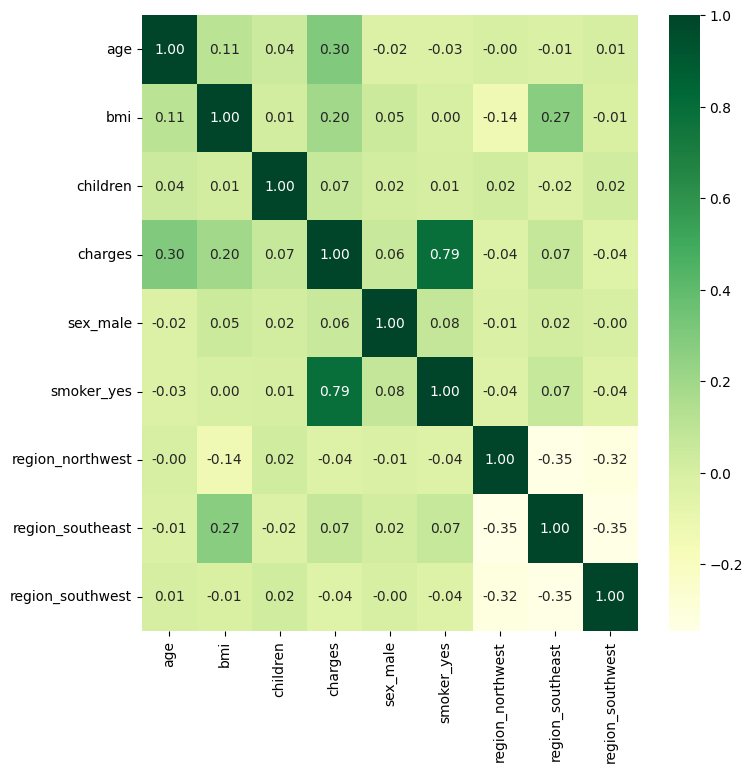

In [ ]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.show()

- 위에서 예상했듯이 흡연자와의 상관관계가 크다.

# 데이터 전처리

- 앞서 봤듯이 결측치가 없음.   
- 회귀 분석 중 선형 회귀 분석의 경우를 대비해서 scaler 적용 필요해 보임.
- 범주형 변수의 경우 선형 회귀를 대비해서 더미변수화 하기.
- 고려 사항으로 child 0/양수 아니면 범주형으로 하는것은 어떨지도..?
- BMI지수를 범주형으로?


In [ ]:
# 자녀 유무로 child_group 생성 후 children column 삭제
child_group = []
for i in range(len(df)):
    if df['children'][i]==0:
        child_group.append(0)
    else:
        child_group.append(1)
df['child_group']=pd.DataFrame(child_group)
df.drop(columns=['children'], inplace=True)

In [ ]:
# BMI 30이상 여부로 bmi_group 생성 후 bmi column 삭제
bmi_group = []
for i in range(len(df)):
  if df['bmi'][i] < 30:
    bmi_group.append(0)
  else:
    bmi_group.append(1)
df['bmi_group']=pd.DataFrame(bmi_group)
df.drop(columns=['bmi'], inplace=True)

In [ ]:
df.head()

,age,sex,smoker,region,charges,child_group,bmi_group
0,19,female,yes,southwest,16884.92400,0,0
1,18,male,no,southeast,1725.55230,1,1
2,28,male,no,southeast,4449.46200,1,1
3,33,male,no,northwest,21984.47061,0,0
4,32,male,no,northwest,3866.85520,0,0


In [ ]:
# categorical variables one-hot encoding
df = pd.get_dummies(df, columns=['region'], prefix=['region'])

In [ ]:
# categorical variables label encoding
from sklearn.preprocessing import LabelEncoder
x = df.drop(columns=["charges"], axis=1)
y = df["charges"]
le = LabelEncoder()
x['sex'] = le.fit_transform(x['sex'])
x['smoker'] = le.fit_transform(x['smoker'])

In [ ]:
# train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
con_list = ['age', 'charges']
cat_list = ['sex', 'smoker', 'region', 'child_group', 'bmi_group']

In [ ]:
# x variables scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mm = MinMaxScaler()
X_train_mm = X_train.copy()
X_train_mm[con_list[:-1]] = mm.fit_transform(X_train_mm[con_list[:-1]])
X_test_mm = X_test.copy()
X_test_mm[con_list[:-1]] = mm.transform(X_test_mm[con_list[:-1]])

ss = StandardScaler()
X_train_ss = X_train.copy()
X_train_ss[con_list[:-1]] = ss.fit_transform(X_train_ss[con_list[:-1]])
X_test_ss = X_test.copy()
X_test_ss[con_list[:-1]] = ss.transform(X_test_ss[con_list[:-1]])

In [ ]:
X_test_mm.head()

,age,sex,smoker,child_group,bmi_group,region_northeast,region_northwest,region_southeast,region_southwest
861,0.434783,0,0,1,0,False,False,False,True
1165,0.369565,0,0,0,0,True,False,False,False
1160,0.543478,0,0,1,1,False,True,False,False
793,0.760870,1,1,0,0,False,False,True,False
1208,0.413043,0,1,1,0,True,False,False,False


In [ ]:
X_test_ss.head()

,age,sex,smoker,child_group,bmi_group,region_northeast,region_northwest,region_southeast,region_southwest
861,-0.082599,0,0,1,0,False,False,False,True
1165,-0.296251,0,0,0,0,True,False,False,False
1160,0.273488,0,0,1,1,False,True,False,False
793,0.985662,1,1,0,0,False,False,True,False
1208,-0.153816,0,1,1,0,True,False,False,False


1. 선형 모델

1.1 Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

# MinMaxScaler
lr.fit(X_train_mm, y_train)
y_preds_mmlr = lr.predict(X_test_mm)
mse_mmlr = mean_squared_error(y_test, y_preds_mmlr)
rmse_mmlr = np.sqrt(mse_mmlr)
print('RMSE_mmlr : {0:.4f}'.format(rmse_mmlr))

# StandardScaler
lr.fit(X_train_ss, y_train)
y_preds_sslr = lr.predict(X_test_ss)
mse_sslr = mean_squared_error(y_test, y_preds_sslr)
rmse_sslr = np.sqrt(mse_sslr)
print('RMSE_sslr : {0:.4f}'.format(rmse_sslr))

RMSE_mmlr : 6445.5644
RMSE_sslr : 6438.8225


1.2 Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()

# MinMaxScaler
ridge.fit(X_train_mm, y_train)
y_preds_mmridge = ridge.predict(X_test_mm)
mse_mmridge = mean_squared_error(y_test, y_preds_mmridge)
rmse_mmridge = np.sqrt(mse_mmridge)
print('RMSE_mmridge : {0:.4f}'.format(rmse_mmridge))

# StandardScaler
ridge.fit(X_train_ss, y_train)
y_preds_ssridge = ridge.predict(X_test_ss)
mse_ssridge = mean_squared_error(y_test, y_preds_ssridge)
rmse_ssridge = np.sqrt(mse_ssridge)
print('RMSE_ssridge : {0:.4f}'.format(rmse_ssridge))

RMSE_mmridge : 6455.5859
RMSE_ssridge : 6445.6382


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

ridge_alpha = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 20,
                          25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 125, 150, 200]}
grid_ridge = GridSearchCV(ridge, param_grid = ridge_alpha, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_ridge.fit(X_train_mm, y_train)
y_preds_mmridge = grid_ridge.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_ridge.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_ridge.best_score_))

# StandardScaler
grid_ridge.fit(X_train_ss, y_train)
y_preds_ssridge = grid_ridge.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_ridge.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_ridge.best_score_))

최적 하이퍼 파라미터:
 {'alpha': 0.0001}
최고 예측 RMSE: 5944.4635
최적 하이퍼 파라미터:
 {'alpha': 0.0001}
최고 예측 RMSE: 5944.4635


1.3 Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# MinMaxScaler
lasso.fit(X_train_mm, y_train)
y_preds_mmlasso = lasso.predict(X_test_mm)
mse_mmlasso = mean_squared_error(y_test, y_preds_mmlasso)
rmse_mmlasso = np.sqrt(mse_mmlasso)
print('RMSE_mmlasso : {0:.4f}'.format(rmse_mmlasso))

# StandardScaler
lasso.fit(X_train_ss, y_train)
y_preds_sslasso = lasso.predict(X_test_ss)
mse_sslasso = mean_squared_error(y_test, y_preds_sslasso)
rmse_sslasso = np.sqrt(mse_sslasso)
print('RMSE_sslasso : {0:.4f}'.format(rmse_sslasso))

RMSE_mmlasso : 6445.9093
RMSE_sslasso : 6438.9373


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

lasso_alpha = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 20,
                          25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 125, 150, 200]}
grid_lasso = GridSearchCV(lasso, param_grid = lasso_alpha, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_lasso.fit(X_train_mm, y_train)
y_preds_mmlasso = grid_lasso.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_lasso.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_lasso.best_score_))

# StandardScaler
grid_lasso.fit(X_train_ss, y_train)
y_preds_sslasso = grid_lasso.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_lasso.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_lasso.best_score_))

최적 하이퍼 파라미터:
 {'alpha': 0.0001}
최고 예측 RMSE: 5944.4634
최적 하이퍼 파라미터:
 {'alpha': 0.0001}
최고 예측 RMSE: 5944.4634


1.4 Elastic Regression

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(l1_ratio=0.5)

# MinMaxScaler
elastic.fit(X_train_mm, y_train)
y_preds_mmel = elastic.predict(X_test_mm)
mse_mmel = mean_squared_error(y_test, y_preds_mmel)
rmse_mmel = np.sqrt(mse_mmel)
print('RMSE_mmel : {0:.4f}'.format(rmse_mmel))

# StandardScaler
elastic.fit(X_train_ss, y_train)
y_preds_ssel = elastic.predict(X_test_ss)
mse_ssel = mean_squared_error(y_test, y_preds_ssel)
rmse_ssel = np.sqrt(mse_ssel)
print('RMSE_ssel : {0:.4f}'.format(rmse_ssel))

RMSE_mmel : 11241.1520
RMSE_ssel : 10782.6608


In [ ]:
# GridSearch (l1은 0.5로 고정)
from sklearn.model_selection import GridSearchCV

elastic_alpha = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 20,
                          25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 125, 150, 200]}
grid_elastic = GridSearchCV(elastic, param_grid = elastic_alpha, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_elastic.fit(X_train_mm, y_train)
y_preds_mmel = grid_elastic.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_elastic.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_elastic.best_score_))

# StandardScaler
grid_elastic.fit(X_train_ss, y_train)
y_preds_ssel = grid_elastic.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_elastic.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_elastic.best_score_))

최적 하이퍼 파라미터:
 {'alpha': 0.0001}
최고 예측 RMSE: 5944.4904
최적 하이퍼 파라미터:
 {'alpha': 0.0001}
최고 예측 RMSE: 5944.4849


1.5 SGD Regression

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()

# MinMaxScaler
sgd.fit(X_train_mm, y_train)
y_preds_mmsgd = sgd.predict(X_test_mm)
mse_mmsgd = mean_squared_error(y_test, y_preds_mmsgd)
rmse_mmsgd = np.sqrt(mse_mmsgd)
print('RMSE_mmsgd : {0:.4f}'.format(rmse_mmsgd))

# StandardScaler
sgd.fit(X_train_ss, y_train)
y_preds_sssgd = sgd.predict(X_test_ss)
mse_sssgd = mean_squared_error(y_test, y_preds_sssgd)
rmse_sssgd = np.sqrt(mse_sssgd)
print('RMSE_sssgd : {0:.4f}'.format(rmse_sssgd))

RMSE_mmsgd : 6478.4206
RMSE_sssgd : 6451.8700


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

sgd_param_grid={'max_iter' : [500, 1000, 2000, 3000],
               'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 20,
                          25, 30],
               'penalty': ['l2', 'l1', 'elasticnet'],
               'eta0': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 3, 5, 7, 10, 15, 25, 30],
               'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}
grid_sgd = GridSearchCV(sgd, param_grid = sgd_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_sgd.fit(X_train_mm, y_train)
y_preds_mmsgd = grid_sgd.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_sgd.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_sgd.best_score_))

# StandardScaler
grid_sgd.fit(X_train_ss, y_train)
y_preds_sssgd = grid_sgd.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_sgd.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_sgd.best_score_))

최적 하이퍼 파라미터:
 {'alpha': 0.01, 'eta0': 0.0001, 'learning_rate': 'optimal', 'max_iter': 500, 'penalty': 'l1'}
최고 예측 RMSE: 5931.4675
최적 하이퍼 파라미터:
 {'alpha': 0.05, 'eta0': 1, 'learning_rate': 'optimal', 'max_iter': 500, 'penalty': 'l1'}
최고 예측 RMSE: 5925.0229


2. 트리 기반 모델

2.1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# MinMaxScaler
rf.fit(X_train_mm, y_train)
y_preds_mmrf = rf.predict(X_test_mm)
mse_mmrf = mean_squared_error(y_test, y_preds_mmrf)
rmse_mmrf = np.sqrt(mse_mmrf)
print('RMSE_mmrf : {0:.4f}'.format(rmse_mmrf))

# StandardScaler
rf.fit(X_train_ss, y_train)
y_preds_ssrf = rf.predict(X_test_ss)
mse_ssrf = mean_squared_error(y_test, y_preds_ssrf)
rmse_ssrf = np.sqrt(mse_ssrf)
print('RMSE_ssrf : {0:.4f}'.format(rmse_ssrf))

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

rf_param_grid={'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500],
               'max_samples': [0.5, 1.0],
               'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30],
               'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
grid_rf = GridSearchCV(rf, param_grid = rf_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_rf.fit(X_train_mm, y_train)
y_preds_mmrf = grid_rf.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_rf.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_rf.best_score_))

# StandardScaler
grid_rf.fit(X_train_ss, y_train)
y_preds_ssrf = grid_rf.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_rf.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_rf.best_score_))

2.2 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbm = GradientBoostingRegressor()

# MinMaxScaler
gbm.fit(X_train_mm, y_train)
y_preds_mmgbm = gbm.predict(X_test_mm)
mse_mmgbm = mean_squared_error(y_test, y_preds_mmgbm)
rmse_mmgbm = np.sqrt(mse_mmgbm)
print('RMSE_mmgbm : {0:.4f}'.format(rmse_mmgbm))

# StandardScaler
gbm.fit(X_train_ss, y_train)
y_preds_ssgbm = gbm.predict(X_test_ss)
mse_ssgbm = mean_squared_error(y_test, y_preds_ssgbm)
rmse_ssgbm = np.sqrt(mse_ssgbm)
print('RMSE_ssgbm : {0:.4f}'.format(rmse_ssgbm))

RMSE_mmgbm : 4427.2871
RMSE_ssgbm : 4427.2871


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

# 처음엔 'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500], 'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30], 'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2],
# 'subsample' : [0.4, 0.5, 0.6, 0.8, 1.0], 'min_samples_leaf': [1, 2, 4, 6, 8, 10] 로 했는데 12시간 넘게 걸려서 짧게 줄였습니다
gbm_param_grid={'n_estimators' : [10, 100, 1000], 'max_depth' : [None, 5, 10], 'learning_rate' : [0.001, 0.01, 0.1], 'subsample' : [0.4, 0.6, 1.0], 'min_samples_leaf' : [1, 6, 10]}
grid_gbm = GridSearchCV(gbm, param_grid = gbm_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_gbm.fit(X_train_mm, y_train)
y_preds_mmgbm = grid_gbm.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_gbm.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_gbm.best_score_))

# StandardScaler
grid_gbm.fit(X_train_ss, y_train)
y_preds_ssgbm = grid_gbm.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_gbm.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_gbm.best_score_))

최적 하이퍼 파라미터:
 {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 1000, 'subsample': 0.4}
최고 예측 RMSE: 4715.2325
최적 하이퍼 파라미터:
 {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 1000, 'subsample': 0.4}
최고 예측 RMSE: 4704.8658


2.3 LGBM

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

# MinMaxScaler
lgbm.fit(X_train_mm, y_train)
y_preds_mmlgbm = lgbm.predict(X_test_mm)
mse_mmlgbm = mean_squared_error(y_test, y_preds_mmlgbm)
rmse_mmlgbm = np.sqrt(mse_mmlgbm)
print('RMSE_mmlgbm : {0:.4f}'.format(rmse_mmlgbm))

# StandardScaler
lgbm.fit(X_train_ss, y_train)
y_preds_sslgbm = lgbm.predict(X_test_ss)
mse_sslgbm = mean_squared_error(y_test, y_preds_sslgbm)
rmse_sslgbm = np.sqrt(mse_sslgbm)
print('RMSE_sslgbm : {0:.4f}'.format(rmse_sslgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13005.028608
RMSE_mmlgbm : 4747.7239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 9
[LightGBM] [Info] Start training from score 13005.028608
RMSE_sslgbm : 4747.7239


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

# 처음엔 'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500], 'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30], 'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2],
# 'subsample' : [0.4, 0.5, 0.6, 0.8, 1.0], 'num_leaves': [31, 62, 127] 로 했는데 오류가 나서 짧게 줄였습니다
lgbm_param_grid={'n_estimators' : [10, 100, 1000],
               'max_depth' : [None, 5, 10],
               'learning_rate' : [0.001, 0.01, 0.1],
                'subsample' : [0.4, 0.6, 1.0],
               'num_leaves': [31, 62, 127]}
grid_lgbm = GridSearchCV(lgbm, param_grid = lgbm_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_lgbm.fit(X_train_mm, y_train)
y_preds_mmlgbm = grid_lgbm.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_lgbm.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_lgbm.best_score_))

# StandardScaler
grid_lgbm.fit(X_train_ss, y_train)
y_preds_sslgbm = grid_lgbm.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_lgbm.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_lgbm.best_score_))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

2.4 XGBoost

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor()

# MinMaxScaler
xgb.fit(X_train_mm, y_train)
y_preds_mmxgb = xgb.predict(X_test_mm)
mse_mmxgb = mean_squared_error(y_test, y_preds_mmxgb)
rmse_mmxgb = np.sqrt(mse_mmxgb)
print('RMSE_mmxgb : {0:.4f}'.format(rmse_mmxgb))

# StandardScaler
xgb.fit(X_train_ss, y_train)
y_preds_ssxgb = xgb.predict(X_test_ss)
mse_ssxgb = mean_squared_error(y_test, y_preds_ssxgb)
rmse_ssxgb = np.sqrt(mse_ssxgb)
print('RMSE_ssxgb : {0:.4f}'.format(rmse_ssxgb))

RMSE_mmxgb : 6079.8052
RMSE_ssxgb : 6079.8052


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

xgb_param_grid={'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30],
               'learning_rate' : [0.001, 0.01, 0.05, 0.1, 0.2],
                'subsample' : [0.4, 0.5, 0.6, 0.8, 1.0], 'gamma' : [0, 1, 2],}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_xgb.fit(X_train_mm, y_train)
y_preds_mmxgb = grid_xgb.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_xgb.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_xgb.best_score_))

# StandardScaler
grid_xgb.fit(X_train_ss, y_train)
y_preds_ssxgb = grid_xgb.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_xgb.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_xgb.best_score_))

최적 하이퍼 파라미터:
 {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.4}
최고 예측 RMSE: 4572.4873
최적 하이퍼 파라미터:
 {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'subsample': 0.4}
최고 예측 RMSE: 4572.4873


2.5 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

# MinMaxScaler
dt.fit(X_train_mm, y_train)
y_preds_mmdt = dt.predict(X_test_mm)
mse_mmdt = mean_squared_error(y_test, y_preds_mmdt)
rmse_mmdt = np.sqrt(mse_mmdt)
print('RMSE_mmdt : {0:.4f}'.format(rmse_mmdt))

# StandardScaler
dt.fit(X_train_ss, y_train)
y_preds_ssdt = dt.predict(X_test_ss)
mse_ssdt = mean_squared_error(y_test, y_preds_ssdt)
rmse_ssdt = np.sqrt(mse_ssdt)
print('RMSE_ssdt : {0:.4f}'.format(rmse_ssdt))

RMSE_mmdt : 7145.6008
RMSE_ssdt : 7132.9060


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

dt_param_grid={'max_depth' : [None, 2, 3, 4, 5, 6, 7, 9, 10, 20, 30],
                'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
grid_dt = GridSearchCV(dt, param_grid = dt_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_dt.fit(X_train_mm, y_train)
y_preds_mmdt = grid_dt.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_dt.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_dt.best_score_))

# StandardScaler
grid_dt.fit(X_train_ss, y_train)
y_preds_ssdt = grid_dt.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_dt.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_dt.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 5, 'min_samples_leaf': 8}
최고 예측 RMSE: 4622.9267
최적 하이퍼 파라미터:
 {'max_depth': 5, 'min_samples_leaf': 8}
최고 예측 RMSE: 4615.1773


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

# MinMaxScaler
ada.fit(X_train_mm, y_train)
y_preds_mmada = ada.predict(X_test_mm)
mse_mmada = mean_squared_error(y_test, y_preds_mmada)
rmse_mmada = np.sqrt(mse_mmada)
print('RMSE_mmada : {0:.4f}'.format(rmse_mmada))

# StandardScaler
ada.fit(X_train_ss, y_train)
y_preds_ssada = ada.predict(X_test_ss)
mse_ssada = mean_squared_error(y_test, y_preds_ssada)
rmse_ssada = np.sqrt(mse_ssada)
print('RMSE_ssada : {0:.4f}'.format(rmse_ssada))

RMSE_mmada : 5753.0999
RMSE_ssada : 5839.8059


In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearch
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [2, 3, 4],  # base_estimator의 max_depth 설정
    'loss': ['linear', 'square', 'exponential']
}

grid_ada = GridSearchCV(ada, param_grid=ada_param_grid, scoring='neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_ada.fit(X_train_mm, y_train)
y_preds_mmada = grid_ada.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_ada.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1 * grid_ada.best_score_))

# StandardScaler
grid_ada.fit(X_train_ss, y_train)
y_preds_ssada = grid_ada.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_ada.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1 * grid_ada.best_score_))

최적 하이퍼 파라미터:
 {'base_estimator__max_depth': 4, 'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}
최고 예측 RMSE: 4476.4556
최적 하이퍼 파라미터:
 {'base_estimator__max_depth': 4, 'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50}
최고 예측 RMSE: 4500.8895


Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor()

# MinMaxScaler
bagging.fit(X_train_mm, y_train)
y_preds_mmbg = bagging.predict(X_test_mm)
mse_mmbg = mean_squared_error(y_test, y_preds_mmbg)
rmse_mmbg = np.sqrt(mse_mmbg)
print('RMSE_mmbg : {0:.4f}'.format(rmse_mmbg))

# StandardScaler
bagging.fit(X_train_ss, y_train)
y_preds_ssbg = bagging.predict(X_test_ss)
mse_ssbg = mean_squared_error(y_test, y_preds_ssbg)
rmse_ssbg = np.sqrt(mse_ssbg)
print('RMSE_ssbg : {0:.4f}'.format(rmse_ssbg))

RMSE_mmbg : 5363.9844
RMSE_ssbg : 5710.9793


In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

bg_param_grid={'n_estimators' : [10, 50, 100, 200, 300, 500, 1000, 1500],
               'max_samples': [0.5, 1.0]}
grid_bagging = GridSearchCV(bagging, param_grid = bg_param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# MinMaxScaler
grid_bagging.fit(X_train_mm, y_train)
y_preds_mmbg = grid_bagging.predict(X_test_mm)
print('최적 하이퍼 파라미터:\n', grid_bagging.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_bagging.best_score_))

# StandardScaler
grid_bagging.fit(X_train_ss, y_train)
y_preds_ssbg = grid_bagging.predict(X_test_ss)
print('최적 하이퍼 파라미터:\n', grid_bagging.best_params_)
print('최고 예측 RMSE: {0:.4f}'.format(-1*grid_bagging.best_score_))

최적 하이퍼 파라미터:
 {'max_samples': 0.5, 'n_estimators': 1000}
최고 예측 RMSE: 4748.6923
최적 하이퍼 파라미터:
 {'max_samples': 0.5, 'n_estimators': 500}
최고 예측 RMSE: 4739.6014
